# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>

<img src="Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
## Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([ np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


It does not really matter but I like yearly columns better...

In [2]:
%matplotlib notebook

#df1992 = df[1992,:]
#df1992
#np.mean(df.iloc[0])
df = df.T
dfMean = df.mean().tolist()
dfStd = df.std().tolist()

# Easiest Option (let's see, how far I get...)
Description of the task: *"Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable."*<br>
Data is available in a pandas DataFrame.
Following Professor Brooke's advice and looking for solution approaches also in sources other than the lecture, I found __[this](https://pythonforundergradengineers.com/python-matplotlib-error-bars.html)__.

In [3]:
x_pos = np.arange(1992,1992+len(df.columns))

dfMean
df.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


<IPython.core.display.Javascript object>


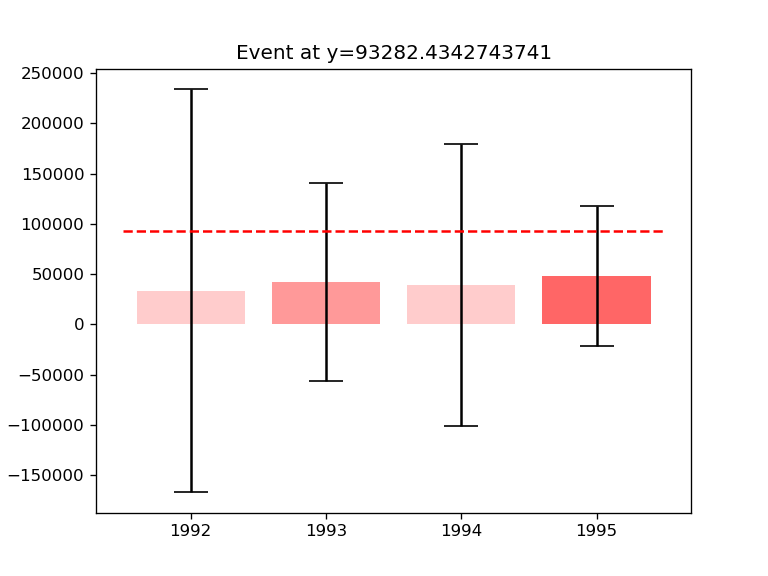

In [4]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
axes.bar(x_pos,dfMean,yerr=dfStd,align='center',alpha=0.5,ecolor='black',capsize=10)
axes.set_xticks(x_pos)
plt.show()


Ok, long whiskers compared to small bars. Seemed wrong to me first but looking up at how the data were generated (1992 with a mean of 32k and a standard deviation of 200k) this seems to be it.
There is obviously no y-value where one bar is surely below and another bar is surely above.
For a value of 160k, the 1993 and 1995 bars are clearly below while the 1992 and 1994 bars are maybe in.

In [5]:
from operator import add,sub
dfMax = list(map(add,dfMean,dfStd))
dfMin = list(map(sub,dfMean,dfStd))

Next is the threshold input

In [6]:
yInterest = 100000
yInterest = -60000
yInterest = 80000
yInterest = 60000
yInterest = 160000
yInterest = -120000


yInterestList = [yInterest] * 4

In [7]:
def dfCmp(barMin,barMax,barInt):
    if (barMax >= barInt) and (barMin < barInt):
        return 'yellow'
    elif barMax < barInt:
        return 'red'
    elif barMin >= barInt:
        return 'blue'
    
colors = list(map(dfCmp,dfMin,dfMax,yInterestList))
axes.bar(x_pos,dfMean,yerr=dfStd,align='center',ecolor='black',capsize=10,color=colors)
axes.plot([1991.5, 1995.5], [yInterest, yInterest], "r--")

plt.show()

Looks allright. 

# Second option
Description of the task: *"Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis)."* <br>
For convenience, here is the picture again...<br>
<img src="Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<br>
Assumption/interpretation: Gradient colors are only to be used between the solid ends of "certainly below" and "certainly above".
I will try coloring in 11 steps, equally spacing RGB values from 0,0,255 to 255,0,0. Made a picture and it looks like this:
<img src="colorbar11.png" alt="Figure 2" />

The list below has 11 fields with the 11 RGB combinations. Indices are 0..10.

In [8]:
colorbar = [[0,0,255],[51,51,255],[102,102,255],
            [153,153,255],[204,204,255],[255,255,255],
            [255,204,204],[255,153,153],[255,102,102],
            [255,51,51],[255,0,0]]
#actually, the RGB strings are more convenient...
colorbar = ['#0000ff','#3333ff','#6666ff','#9999ff',
            '#ccccff','#ffffff','#ffcccc','#ff9999',
            '#ff6666','#ff3333','#ff0000']

When picking a color from this choice, the key calculates as<br> $ key = 10 * int(\frac{thres - min}{max - min }) $.<br>
Validation: For thres = max, the fraction equals to 1 and the key is 10, meaning red.
min and max are the dfMin and dfMax from above, thres is yInterest (or yInterestList).

In [9]:
def df11Colors(barMin,barMax,barInt):
    print(barMin,barMax,barInt)
    if barInt > barMax:
        key = 10
    elif barInt < barMin:
        key = 0
    else:
        key = min([10,int(10 * (barInt-barMin)/(barMax-barMin))])
    return colorbar[key]
    
colors = list(map(df11Colors,dfMin,dfMax,yInterestList))
axes.clear()
axes.set_xticks(x_pos)
axes.bar(x_pos,dfMean,yerr=dfStd,align='center',ecolor='black',capsize=10,color=colors)
axes.plot([1991.5, 1995.5], [yInterest, yInterest], "r--")
plt.show()

-167318.79407697564 233943.0090280643 -120000
-56536.49666226883 140260.21574441562 -120000
-100876.62029876615 179863.23018156397 -120000
-22037.63449987711 117524.73643841138 -120000


# Third option
Description of the task: *"Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected."*
For this, I look at the interactivity example of the lecture first.

In [10]:
def onclick(event):
    plt.cla()
    # plt.plot(data)
    colors = list(map(df11Colors,dfMin,dfMax,[event.ydata]*4))
    axes.clear()
    axes.set_xticks(x_pos)
    axes.bar(x_pos,dfMean,yerr=dfStd,align='center',ecolor='black',capsize=10,color=colors)
    # axes.plot([1991.5, 1995.5], [yInterest, yInterest], "r--")
    axes.plot([1991.5, 1995.5], [event.ydata, event.ydata], "r--")
    plt.gca().set_title('Event at y={}'.format(event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

Nice and easy! With only small modification of the lecture example! Fun!

# Fourth option
Description of the task: *"Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details)."*